In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data
raw_data = pd.read_csv('D://Data Science//Datasets//Sales Prediction//train.csv')
rawtest_data =  pd.read_csv('D://Data Science//Datasets//Sales Prediction//test.csv')

In [3]:
#Making copy of the data for futher referance
df = raw_data.copy()
test = rawtest_data.copy()

In [4]:
#Overview of data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Preprocessing

In [8]:
#Removing unneccessary columns
df = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [9]:
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [10]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [11]:
#Removing missing values
df.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [12]:
test.isnull().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [13]:
df['Item_Weight'] = df['Item_Weight'].fillna(value=df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(method='ffill')

In [14]:
test['Item_Weight'] = test['Item_Weight'].fillna(value=test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(method='ffill')

In [15]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [16]:
test.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [17]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat', case=False)

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat', case=False)
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular', case=False)

In [21]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('low fat', 'Low Fat', case=False)
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('LF', 'Low Fat', case=False)
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('reg', 'Regular', case=False)

In [22]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regularular', 'Regular'], dtype=object)

In [23]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Regularular'], dtype=object)

In [24]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('Regularular', 'Regular', case=False)

In [25]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('Regularular', 'Regular', case=False)

In [26]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# Data Visualization

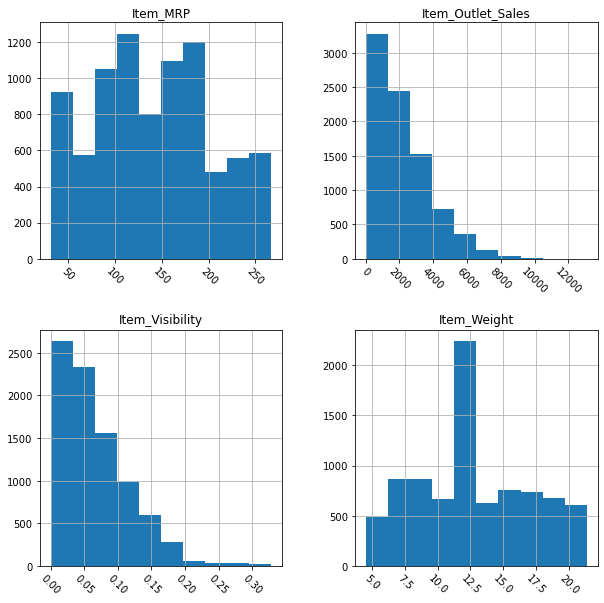

In [29]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

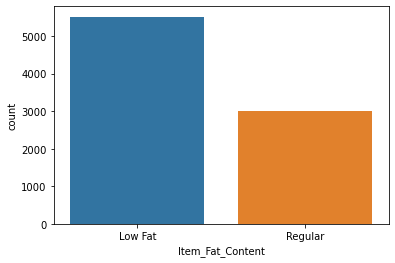

In [30]:
sns.countplot('Item_Fat_Content', data=df)

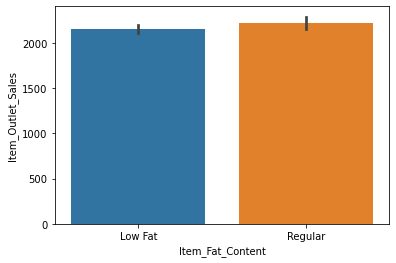

In [31]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

In [32]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

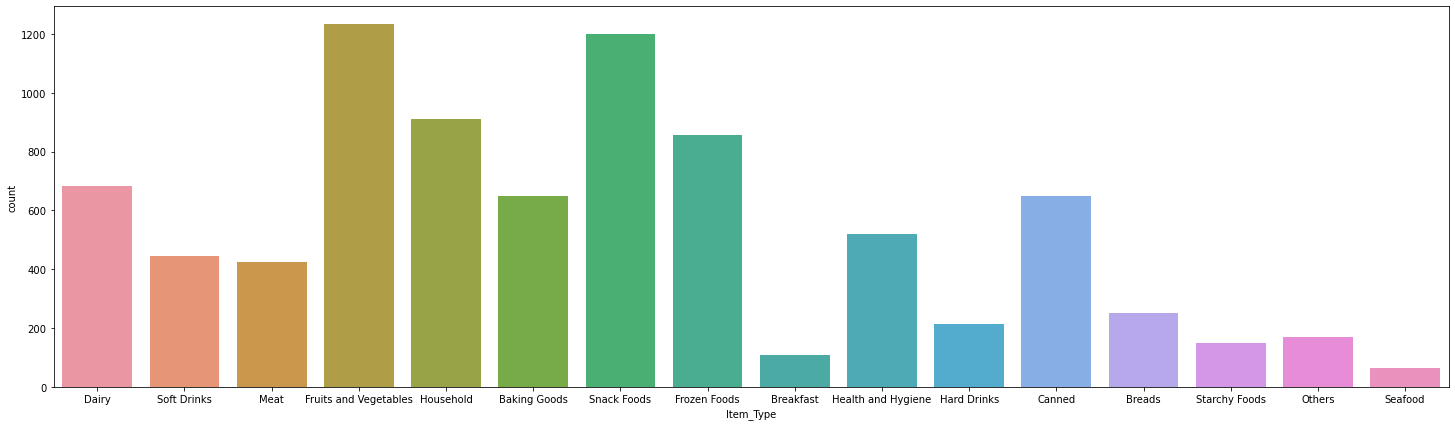

In [33]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=df)

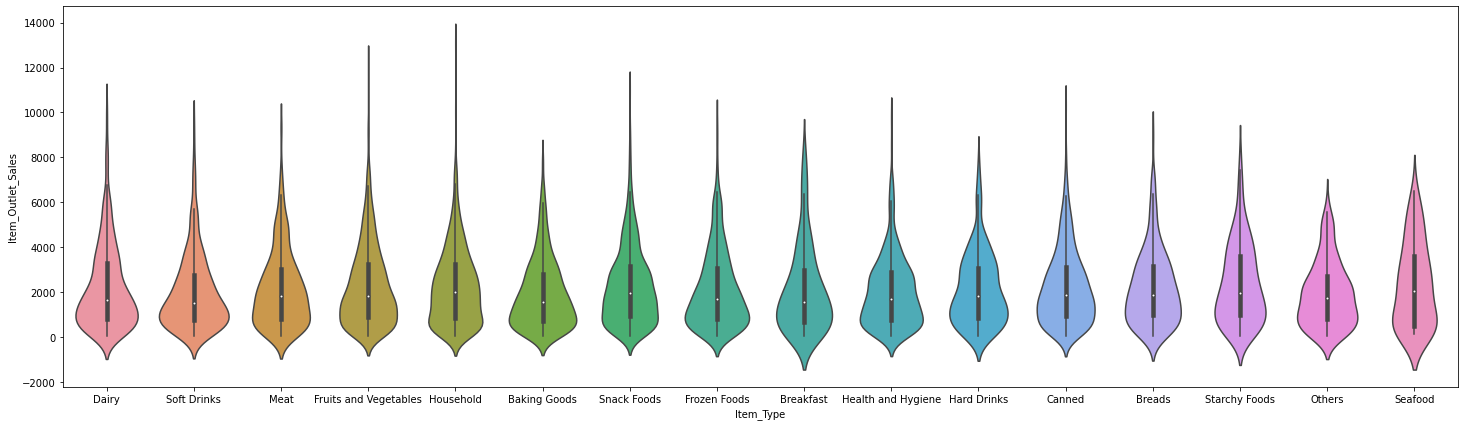

In [34]:
plt.figure(figsize=(25,7))
sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

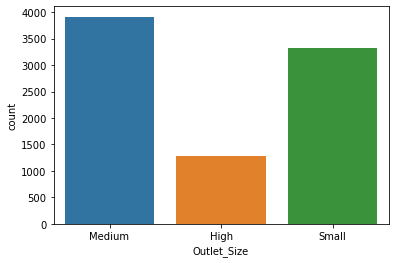

In [35]:
sns.countplot(df['Outlet_Size'])

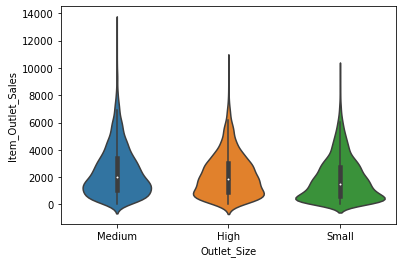

In [36]:
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

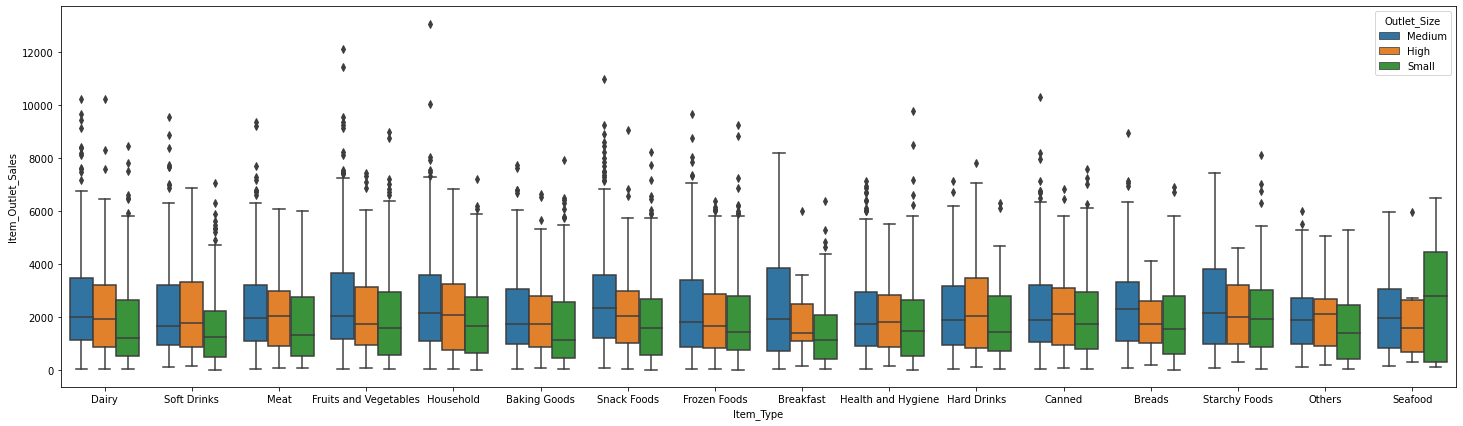

In [37]:
plt.figure(figsize=(25,7))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

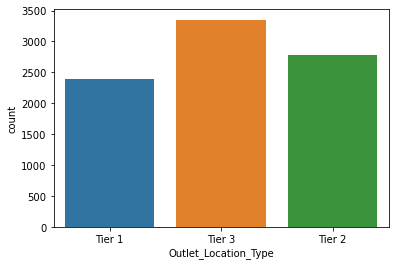

In [38]:
sns.countplot(df['Outlet_Location_Type'])

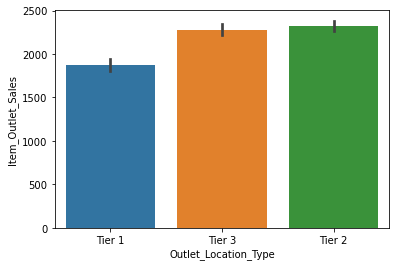

In [39]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

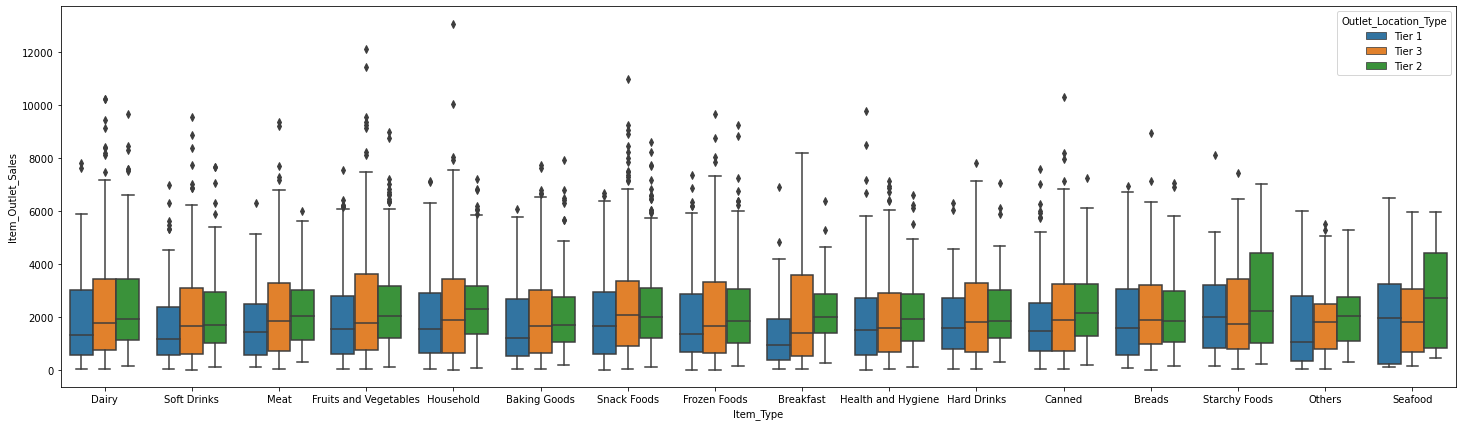

In [40]:
plt.figure(figsize=(25,7))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df)

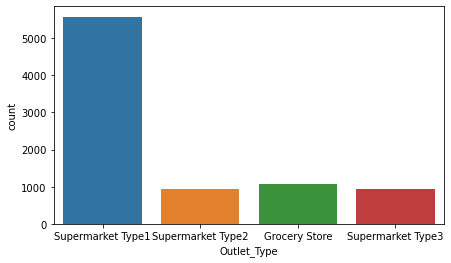

In [41]:
plt.figure(figsize=(7,4))
sns.countplot(df['Outlet_Type'])

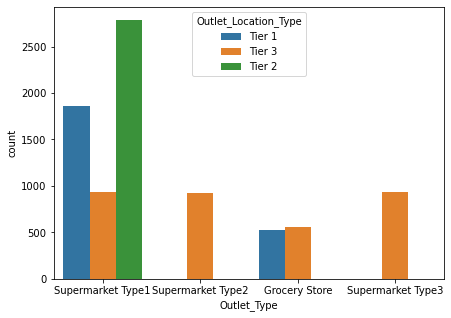

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Location_Type'])

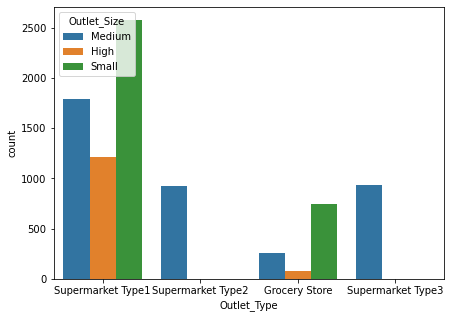

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Size'])

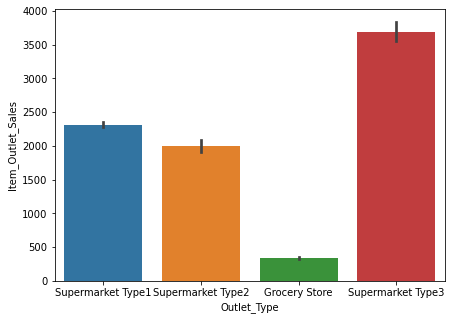

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

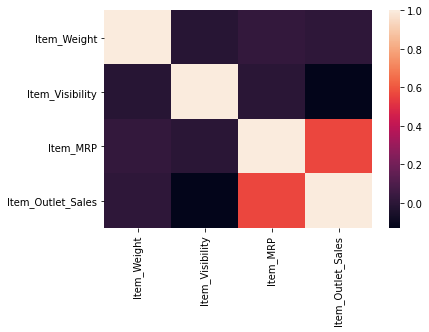

In [45]:
sns.heatmap(df.corr())

In [46]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [47]:
Fat_content = pd.get_dummies(df['Item_Fat_Content'],drop_first=True)
item_Type = pd.get_dummies(df['Item_Type'],drop_first=True)
Size = pd.get_dummies(df['Outlet_Size'],drop_first=True)
Location_Type = pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)
outlet_Type = pd.get_dummies(df['Outlet_Type'],drop_first=True)

In [48]:
Fat_content1 = pd.get_dummies(test['Item_Fat_Content'],drop_first=True)
item_Type1 = pd.get_dummies(test['Item_Type'],drop_first=True)
Size1 = pd.get_dummies(test['Outlet_Size'],drop_first=True)
Location_Type1 = pd.get_dummies(test['Outlet_Location_Type'],drop_first=True)
outlet_Type1 = pd.get_dummies(test['Outlet_Type'],drop_first=True)

In [49]:
df=pd.concat([df,Fat_content,item_Type,Size,Location_Type,outlet_Type],axis=1)

In [50]:
test=pd.concat([test,Fat_content1,item_Type1,Size1,Location_Type1,outlet_Type1],axis=1)

In [51]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Regular', 'Breads', 'Breakfast', 'Canned',
       'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium', 'Small',
       'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [52]:
df = df.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [53]:
test = test.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [54]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [55]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0.007565,107.8622,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


# Model Building

In [56]:
#separting dependent and independent features.
target=df['Item_Outlet_Sales']
inputs=df.drop(['Item_Outlet_Sales'],axis=1)

In [57]:
target.shape

(8523,)

In [58]:
inputs.shape

(8523, 26)

In [59]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs)
X = scaler.transform(inputs)

In [60]:
scaler.fit(test)
test_input = scaler.transform(test)

In [61]:
#Splitting train data into tarin & test for building and testing model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,target, test_size=0.20, random_state=7)

In [62]:
#Model 1 RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
rf_reg.fit(x_train,y_train)
y_pred=rf_reg.predict(x_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5361865613744636

In [64]:
#Model 2 Xtreme Gradient Boost
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
xgb_reg.fit(x_train,y_train)
y_pred=xgb_reg.predict(x_test)

C:\Users\Akii\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[13:38:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5214724306605949

In [66]:
# Model 3 Simple Vector Regressor
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train,y_train)
y_pred=svr_reg.predict(x_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.004934506504986391

In [68]:
#Model 4 Bagging Regressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
br_reg.fit(x_train,y_train)
y_pred=br_reg.predict(x_test)

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5360652022346749

In [70]:
#Model 5 Gradient Boosting
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
gbr_reg.fit(x_train,y_train)
y_pred=gbr_reg.predict(x_test)

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5248680646921509

In [72]:
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'n_estimators':range(20,81,10),
         'max_depth':range(5,16,2),
         'min_samples_split':range(200,1001,200)
         }
rand_search = RandomizedSearchCV(rf_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_

0.5995977983696962

In [73]:
"""
n_estimators=[500,800,1500,2500,5000]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
max_depth.append(None)
min_samples_split=[2,5,10,15,25]
min_samples_leaf=[1,2,5,10,15]
"""

"\nn_estimators=[500,800,1500,2500,5000]\nmax_features=['auto','sqrt','log2']\nmax_depth=[10,20,30,40,50]\nmax_depth.append(None)\nmin_samples_split=[2,5,10,15,25]\nmin_samples_leaf=[1,2,5,10,15]\n"

In [74]:
"""
grid_param = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
"""

"\ngrid_param = {'n_estimators':n_estimators,\n             'max_features':max_features,\n             'max_depth':max_depth,\n             'min_samples_split':min_samples_split,\n             'min_samples_leaf':min_samples_leaf}\n"

In [75]:
"""
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rand_search = RandomizedSearchCV(rf_reg,param_distributions=grid_param,n_iter=500,cv=5,verbose=2,random_state=77,n_jobs=-1)
"""

'\nfrom sklearn.model_selection import RandomizedSearchCV, GridSearchCV\nrand_search = RandomizedSearchCV(rf_reg,param_distributions=grid_param,n_iter=500,cv=5,verbose=2,random_state=77,n_jobs=-1)\n'

In [76]:
"""
rand_search.fit(x_train, y_train)
rand_search.best_score_
"""

'\nrand_search.fit(x_train, y_train)\nrand_search.best_score_\n'

In [77]:
rand_search.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_split=200, n_estimators=80,
                      random_state=51)

In [78]:
rf_reg = RandomForestRegressor(max_depth=15, min_samples_split=200, n_estimators=30,
                      random_state=51)
rf_reg.fit(x_train,y_train)
y_pred=gbr_reg.predict(x_test)

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1469701.0870006278

In [80]:
sales=rf_reg.predict(test_input)

In [81]:
"""
Item_Identifier1 = rawtest_data['Item_Identifier']
Outlet_Identifier1 = rawtest_data['Outlet_Identifier']
dict = {'Item_Identifier':Item_Identifier1 , 'Outlet_Identifier': Outlet_Identifier1,'Sales':sales}
sub = pd.DataFrame(dict)
sub.to_csv('D:\\Data Science\\Datasets\\Sales Prediction\\Final_Submission1.csv', header=False, index=False)
"""

"\nItem_Identifier1 = rawtest_data['Item_Identifier']\nOutlet_Identifier1 = rawtest_data['Outlet_Identifier']\ndict = {'Item_Identifier':Item_Identifier1 , 'Outlet_Identifier': Outlet_Identifier1,'Sales':sales}\nsub = pd.DataFrame(dict)\nsub.to_csv('D:\\Data Science\\Datasets\\Sales Prediction\\Final_Submission1.csv', header=False, index=False)\n"